# AND Perceptron:

In [95]:
import pandas as pd
# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = 0.0
bias = 0.0

In [96]:
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

In [97]:
# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):    
    # W1X1 +W2X2 + b = 0
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias    
    output = int(linear_combination >= 0)
   # print(test_input , correct_output , linear_combination,output)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

In [98]:
# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 3 wrong.  Keep trying!

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   0.0                    1           No
      0          1                   0.0                    1           No
      1          0                   0.0                    1           No
      1          1                   0.0                    1          Yes


# Not Perceptron:

In [99]:
import pandas as pd
# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = 0.0
bias = 0.0

In [100]:
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

In [101]:
# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

In [102]:
# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=True))

You got 2 wrong.  Keep trying!

   Input 1    Input 2    Linear Combination    Activation Output   Is Correct
0        0          0                   0.0                    1          Yes
1        0          1                   0.0                    1           No
2        1          0                   0.0                    1          Yes
3        1          1                   0.0                    1           No


# Perceptron Algorithm:

Recall that the perceptron step works as follows.

For a point with coordinates(p,q)(p,q), label yy, and prediction given by the equation 
\hat{y} = step(w_1x_1 + w_2x_2 + b) 

y^ =step(w1x 1+w2x2+b):

If the point is correctly classified, do nothing.

If the point is classified positive, but it has a negative label, subtract
\alpha p, \alpha q,αp,αq, and \alphaα
from w_1, w_2,w1 ,w2,and bb respectively.

If the point is classified negative, but it has a positive label, add \alpha p, \alpha q,αp,αq,
and \alphaα
to w_1, w_2,w1,w2,and bb
respectively.

In [126]:
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [127]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

#It would return 1 for Label Positive and 0 for Negative Label
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [129]:
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b
# points are denoted by X[i][0] and X[i][1]
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [134]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 15):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max    
    # These are the solution lines that get plotted below.    
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        
    return boundary_lines

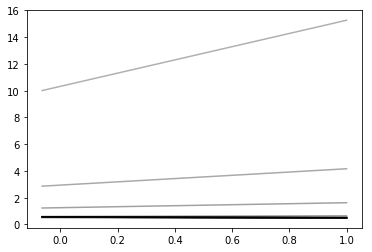

In [198]:
if __name__ == "__main__":
    # perform gradient descent
    train_data = pd.read_csv('data_Perceptron.csv', header = None)
    X = train_data.iloc[:,:-1].values
    y = train_data.iloc[:,-1].values
    regression_coef = trainPerceptronAlgorithm(X, y)
        
    # plot the results
    import matplotlib.pyplot as plt    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        #plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
        plt.plot([X_min, X_max],[X_min*W+b, X_max*W+b ], color = color)
        
    # plt.scatter(X, y)
    # plt.show()